<a href="https://colab.research.google.com/github/Odairjjr/Cupua-u-PCCT/blob/main/PF_IA(Cupu)_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das Bibliotecas

In [ ]:
import pandas as pd #leitura do dataSet
import numpy as np #operações matemáticas
import seaborn as sns #gráficos
import matplotlib.pyplot as plt #gráficos

# Importação do DataSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sementes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto_final_IA/CupuData 3.5 - CupuData.csv')

In [ ]:
sementes_df

,matriz,semente,secas Peso(Pas),umidas Peso(Pi),umidade,Viabilidade
0,M1,1,2.9,4,27.5,V
1,M1,2,2.4,4,40.0,V
2,M1,3,1.7,3,43.3,V
3,M1,4,2.0,4,50.0,E
4,M1,5,2.0,4,50.0,E
...,...,...,...,...,...,...
995,M5,996,1.4,4,65.0,NV
996,M5,997,2.4,3,20.0,V
997,M5,998,1.9,3,36.6,V
998,M5,999,2.3,4,42.5,V


In [ ]:
sementes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   matriz           1000 non-null   object 
 1   semente          1000 non-null   int64  
 2   secas Peso(Pas)  1000 non-null   float64
 3   umidas Peso(Pi)  1000 non-null   int64  
 4   umidade          1000 non-null   float64
 5   Viabilidade      1000 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB


In [ ]:
sementes_df.describe()

,semente,secas Peso(Pas),umidas Peso(Pi),umidade
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.498000,2.153800,3.869000,43.115880
std,288.817717,0.972765,0.820068,23.359857
min,1.000000,0.000000,0.000000,0.000000
25%,250.750000,1.600000,3.000000,27.500000
50%,500.500000,2.100000,4.000000,43.300000
75%,750.250000,2.700000,4.000000,50.000000
max,1000.000000,5.000000,5.000000,100.000000


# Tratamento da base de dados 

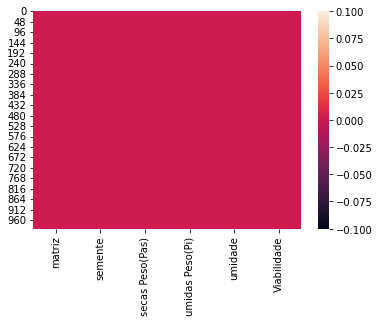

In [ ]:
sns.heatmap(sementes_df.isnull());

In [ ]:
sementes_df['semente'] = sementes_df['semente'].index+1 #+1

In [ ]:
sementes_df.head()

,matriz,semente,secas Peso(Pas),umidas Peso(Pi),umidade,Viabilidade
0,M1,1,2.9,4,27.5,V
1,M1,2,2.4,4,40.0,V
2,M1,3,1.7,3,43.3,V
3,M1,4,2.0,4,50.0,E
4,M1,5,2.0,4,50.0,E


In [ ]:
#transformou 'str' em 'numeric'. Em valor mensuravel 
sementes_df['Viabilidade'].value_counts()

V     425
NV    373
E     202
Name: Viabilidade, dtype: int64

In [ ]:
sementes_df['Viabilidade']

0       V
1       V
2       V
3       E
4       E
       ..
995    NV
996     V
997     V
998     V
999     V
Name: Viabilidade, Length: 1000, dtype: object

In [ ]:
#transformou 'str' em 'numeric'. Em valor mensuravel 
sementes_df['matriz'].value_counts()

M1    200
M2    200
M3    200
M4    200
M5    200
Name: matriz, dtype: int64

In [ ]:
sementes_df['matriz']

0      M1
1      M1
2      M1
3      M1
4      M1
       ..
995    M5
996    M5
997    M5
998    M5
999    M5
Name: matriz, Length: 1000, dtype: object

In [ ]:
sementes_df

,matriz,semente,secas Peso(Pas),umidas Peso(Pi),umidade,Viabilidade
0,M1,1,2.9,4,27.5,V
1,M1,2,2.4,4,40.0,V
2,M1,3,1.7,3,43.3,V
3,M1,4,2.0,4,50.0,E
4,M1,5,2.0,4,50.0,E
...,...,...,...,...,...,...
995,M5,996,1.4,4,65.0,NV
996,M5,997,2.4,3,20.0,V
997,M5,998,1.9,3,36.6,V
998,M5,999,2.3,4,42.5,V


# Viasualização da base de dados

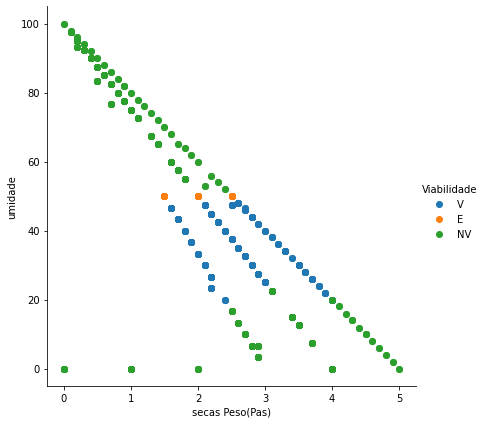

In [ ]:
sns.FacetGrid(sementes_df,hue='Viabilidade',height=6).map(plt.scatter,'secas Peso(Pas)','umidade').add_legend()

# Preparação dos conjuntos 
[2.1] separa, aleatoriamente, 75 % dos dados para treinamento (train) e 25 % para teste (test).

[2.2] irá, para cada classe, colocar 75 % dos dados no treinamento (train) e os 25 % restantes no conjunto de teste (test)

In [ ]:
#[2.1] Formação dos conjuntos de treinamento e teste
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = np.array(sementes_df)

data = data[:, 1:] # remover essa linha caso a primeira coluna corresponda a dados irelevantes

In [ ]:
data

array([[1, 2.9, 4, 27.5, 'V'],
       [2, 2.4, 4, 40.0, 'V'],
       [3, 1.7, 3, 43.3, 'V'],
       ...,
       [998, 1.9, 3, 36.6, 'V'],
       [999, 2.3, 4, 42.5, 'V'],
       [1000, 1.6, 3, 46.6, 'V']], dtype=object)

In [ ]:
# Indentificando os rótulos das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

y = np.array(data[:, data.shape[1]-1])
x = (data[:, :(data.shape[1]-1)]).astype(np.float32)

# Gerando os conjuntos de treinamento e teste (validação)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25) # 0.25 dos dados no conjunto de teste

print('Conjuntos de treinamento e teste separados!')

Conjuntos de treinamento e teste separados!


In [ ]:
#[2.2] Formação dos conjuntos de treinamento e teste
import pandas as pd
import numpy as np

data = np.array(sementes_df)

data = data[:, 1:] # remover essa linha caso a primeira coluna corresponda a dados relevantes

# Indentificando os rótulos das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

# Contando o número de dados (amostras) em cada classe
num_labels = [] # lista com número de amostras por classe
ctrl = [] # lista usada na separação entre treinamento e teste
for label in labels:
  count = 0
  for line in range(data.shape[0]):
    if(label == data[line, data.shape[1]-1]):
      count = count + 1
  num_labels.append(count)
  ctrl.append(0)

# num_labels passa a conter o número de elementos por classe no conjunto de treinamento
train_p = 0.75 # percentual dos dados na lista de treinamento
for i in range(len(num_labels)):
  num_labels[i] = round(num_labels[i] * train_p)

train = int(0) # atribuir 0 seria suficiente, mas resolvi garantir
test = int(0)

# separação dos conjuntos de treinamento (train) e teste (test)
for line in range(data.shape[0]):
  for label in labels:
    if(label == data[line, data.shape[1]-1]):      
      aux = labels.index(label) 
      
      if (ctrl[aux] < num_labels[aux]):
        if (type(train) is int):
          train = data[line, :]
        else:
          train = np.row_stack((train, data[line, :]))      
      else:
        if (type(test) is int):
          test = data[line, :]
        else:
          test = np.row_stack((test, data[line, :]))
      ctrl[aux] = ctrl[aux]+1
      break

train_x = (train[:, :train.shape[1]-1]).astype(np.float32) # entradas de train
train_y = train[:, train.shape[1]-1]  # saídas (classes) de train
test_x = (test[:, :test.shape[1]-1]).astype(np.float32) # entradas de test
test_y = test[:, test.shape[1]-1] # saídas (classes) de test

print('Conjuntos de treinamento e teste separados!')

Conjuntos de treinamento e teste separados!


# Naive Bayes

In [ ]:
# [3] Ajuste do modelo para classes com distribuição gaussiana
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(train_x, train_y)
print('Modelo Ajustado!')

Modelo Ajustado!


# Análise: Conjunto de treinamento

              precision    recall  f1-score   support

           E       1.00      1.00      1.00       152
          NV       0.97      0.94      0.96       280
           V       0.95      0.98      0.96       319

    accuracy                           0.97       751
   macro avg       0.97      0.97      0.97       751
weighted avg       0.97      0.97      0.97       751

A acurácia é  0.9680426098535286


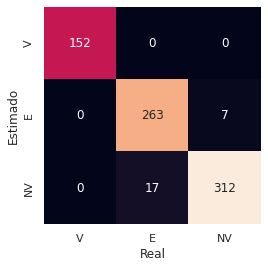

In [ ]:
# [4] Matriz de confusão para o conjunto de treinamento
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

train_est_y = model.predict(train_x)

mat = confusion_matrix(train_y, train_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(train_y, train_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(train_est_y, train_y)) # exibe acurácia

# Análise: Conjunto de teste

              precision    recall  f1-score   support

           E       1.00      1.00      1.00        50
          NV       0.99      0.95      0.97        93
           V       0.95      0.99      0.97       106

    accuracy                           0.98       249
   macro avg       0.98      0.98      0.98       249
weighted avg       0.98      0.98      0.98       249

A acurácia é  0.9759036144578314


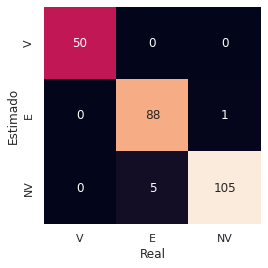

In [ ]:
# [5] Matriz de confusão para o conjunto de teste
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

test_est_y = model.predict(test_x)

mat = confusion_matrix(test_y, test_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(test_y, test_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(test_est_y, test_y)) # exibe acurácia

# Aplicação do algoritimo

In [ ]:
#Cálculo da Taxa de úmidade
pi= 3
pas= 3

u=(pi-pas)/pi*100
print(u)

0.0


In [ ]:
#semente,	secas Peso,	umidas Peso,	umidade,
semente =	1001,	3,	4,	50 # [E] 
semente2= 1001,	3,	3,	0 # [NV]
semente3=1001,	2,	3,	35 #[v]
semente4=1005,  3, 3, 0

In [ ]:
resultado = model.predict([semente4])
resultado

array(['NV'], dtype='<U2')

In [ ]:
if resultado == 'E':
  print(semente[0],'é uma Semente Elite')
  pass

if resultado == 'V':
  print(semente[0],'é uma Semente Viável')
  pass

if resultado == 'NV':
  print(semente[0],'é uma Semente Não viável')
  pass

1001 é uma Semente Não viável


In [ ]:
for i in test_x :
  print(i)

[746.    1.3   4.   67.5]
[7.47e+02 2.00e-01 5.00e+00 9.60e+01]
[748.    1.2   5.   76. ]
[753.    2.5   5.   50. ]
[754.    2.5   5.   50. ]
[756.   1.   4.  75.]
[757.    0.9   5.   82. ]
[758.    1.6   5.   68. ]
[759.     3.7    4.     7.49]
[761.    2.2   4.   44.9]
[762.     2.7    4.    32.49]
[763.   4.   5.  20.]
[764.    2.5   5.   50. ]
[765.    2.5   5.   50. ]
[7.66e+02 6.00e-01 4.00e+00 8.50e+01]
[767.    4.3   5.   14. ]
[7.68e+02 1.00e-01 5.00e+00 9.80e+01]
[769.    3.5   4.   12.5]
[770.    3.5   5.   30. ]
[771.    2.6   4.   35. ]
[772.     3.7    4.     7.49]
[773.    2.9   5.   42. ]
[774.    2.5   5.   50. ]
[775.    2.5   5.   50. ]
[7.76e+02 3.00e-01 4.00e+00 9.25e+01]
[777.    4.7   5.    5.9]
[778.    4.5   5.   10. ]
[779.    3.4   4.   15. ]
[780.    3.6   5.   27.9]
[781.    2.6   4.   35. ]
[782.    2.4   4.   40. ]
[783.    2.6   5.   48. ]
[784.    2.5   5.   50. ]
[785.    2.5   5.   50. ]
[7.86e+02 5.00e-01 4.00e+00 8.75e+01]
[787.   0.   0.   0.]
[788

In [ ]:
for i in test_x :
  nova_semente = i
  resultado = model.predict([nova_semente])
  if resultado == 'E':
    print(i[0],'é uma Semente Elite')
    pass

  if resultado == 'V':
    print(i[0],'é uma Semente Viável')
    pass

  if resultado == 'NV':
    print(i[0],'é uma Semente Não viável')
    pass

746.0 é uma Semente Não viável
747.0 é uma Semente Não viável
748.0 é uma Semente Não viável
753.0 é uma Semente Elite
754.0 é uma Semente Elite
756.0 é uma Semente Não viável
757.0 é uma Semente Não viável
758.0 é uma Semente Não viável
759.0 é uma Semente Não viável
761.0 é uma Semente Viável
762.0 é uma Semente Viável
763.0 é uma Semente Não viável
764.0 é uma Semente Elite
765.0 é uma Semente Elite
766.0 é uma Semente Não viável
767.0 é uma Semente Não viável
768.0 é uma Semente Não viável
769.0 é uma Semente Não viável
770.0 é uma Semente Viável
771.0 é uma Semente Viável
772.0 é uma Semente Não viável
773.0 é uma Semente Viável
774.0 é uma Semente Elite
775.0 é uma Semente Elite
776.0 é uma Semente Não viável
777.0 é uma Semente Não viável
778.0 é uma Semente Não viável
779.0 é uma Semente Não viável
780.0 é uma Semente Viável
781.0 é uma Semente Viável
782.0 é uma Semente Viável
783.0 é uma Semente Viável
784.0 é uma Semente Elite
785.0 é uma Semente Elite
786.0 é uma Semente Nã

In [ ]:
sementes_comum=[]
sementes_elite=[]
sementes_naoviaveis=[]

for i in test_x :
  nova_semente = i
  resultado = model.predict([nova_semente])
  if resultado == 'E':
    print(i[0],'é uma Semente Elite')
    sementes_elite.append(i)
    pass

  if resultado == 'V':
    print(i[0],'é uma Semente Viável')
    sementes_comum.append(i)
    pass

  if resultado == 'NV':
    print(i[0],'é uma Semente Não viável')
    sementes_naoviaveis.append(i)
    pass

746.0 é uma Semente Não viável
747.0 é uma Semente Não viável
748.0 é uma Semente Não viável
753.0 é uma Semente Elite
754.0 é uma Semente Elite
756.0 é uma Semente Não viável
757.0 é uma Semente Não viável
758.0 é uma Semente Não viável
759.0 é uma Semente Não viável
761.0 é uma Semente Viável
762.0 é uma Semente Viável
763.0 é uma Semente Não viável
764.0 é uma Semente Elite
765.0 é uma Semente Elite
766.0 é uma Semente Não viável
767.0 é uma Semente Não viável
768.0 é uma Semente Não viável
769.0 é uma Semente Não viável
770.0 é uma Semente Viável
771.0 é uma Semente Viável
772.0 é uma Semente Não viável
773.0 é uma Semente Viável
774.0 é uma Semente Elite
775.0 é uma Semente Elite
776.0 é uma Semente Não viável
777.0 é uma Semente Não viável
778.0 é uma Semente Não viável
779.0 é uma Semente Não viável
780.0 é uma Semente Viável
781.0 é uma Semente Viável
782.0 é uma Semente Viável
783.0 é uma Semente Viável
784.0 é uma Semente Elite
785.0 é uma Semente Elite
786.0 é uma Semente Nã

In [ ]:
print('N° de sementes viáveis:',len(sementes_comum))
print('N° de sementes eliete:',len(sementes_elite))
print('N° de sementes não viáveis:',len(sementes_naoviaveis))

N° de sementes viáveis: 110
N° de sementes eliete: 50
N° de sementes não viáveis: 89


In [ ]:
for i in sementes_comum:
  print(i[0])

761.0
762.0
770.0
771.0
773.0
780.0
781.0
782.0
783.0
789.0
790.0
791.0
792.0
793.0
798.0
799.0
800.0
801.0
802.0
803.0
810.0
811.0
812.0
813.0
820.0
821.0
823.0
830.0
831.0
832.0
833.0
839.0
840.0
841.0
842.0
843.0
848.0
849.0
850.0
851.0
852.0
853.0
857.0
860.0
861.0
862.0
863.0
868.0
870.0
871.0
873.0
880.0
881.0
882.0
883.0
889.0
890.0
891.0
892.0
893.0
898.0
899.0
900.0
901.0
902.0
903.0
910.0
911.0
912.0
913.0
920.0
921.0
923.0
930.0
931.0
932.0
933.0
939.0
940.0
941.0
942.0
943.0
948.0
949.0
950.0
951.0
952.0
953.0
957.0
960.0
961.0
962.0
963.0
968.0
970.0
971.0
973.0
980.0
981.0
982.0
983.0
989.0
990.0
991.0
992.0
993.0
997.0
998.0
999.0
1000.0


In [ ]:
#print(sementes_elite);

for i in sementes_elite:
  print(i[0])

753.0
754.0
764.0
765.0
774.0
775.0
784.0
785.0
794.0
795.0
804.0
805.0
814.0
815.0
824.0
825.0
834.0
835.0
844.0
845.0
854.0
855.0
864.0
865.0
874.0
875.0
884.0
885.0
894.0
895.0
904.0
905.0
914.0
915.0
924.0
925.0
934.0
935.0
944.0
945.0
954.0
955.0
964.0
965.0
974.0
975.0
984.0
985.0
994.0
995.0


In [ ]:
#print(sementes_naoviaveis);

for i in sementes_naoviaveis:
  print(i[0])

746.0
747.0
748.0
756.0
757.0
758.0
759.0
763.0
766.0
767.0
768.0
769.0
772.0
776.0
777.0
778.0
779.0
786.0
787.0
788.0
796.0
797.0
806.0
807.0
808.0
809.0
816.0
817.0
818.0
819.0
822.0
826.0
827.0
828.0
829.0
836.0
837.0
838.0
846.0
847.0
856.0
858.0
859.0
866.0
867.0
869.0
872.0
876.0
877.0
878.0
879.0
886.0
887.0
888.0
896.0
897.0
906.0
907.0
908.0
909.0
916.0
917.0
918.0
919.0
922.0
926.0
927.0
928.0
929.0
936.0
937.0
938.0
946.0
947.0
956.0
958.0
959.0
966.0
967.0
969.0
972.0
976.0
977.0
978.0
979.0
986.0
987.0
988.0
996.0


In [ ]:
pi= 3
pas= 3

u=(pi-pas)/pi*100
print(u)

0.0


In [ ]:
pi= 4
pas= 4

u=(pi-pas)/pi*100
print(u)

0.0


In [ ]:
pi= 5
pas= 5

u=(pi-pas)/pi*100
print(u)

0.0


In [ ]:
germoplasma_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto_final_IA/teste PCCT-Cupu 2.0 - Página1.csv')

In [ ]:
germoplasma_df

,Matriz,Semente,Secas Peso,Úmidas Peso,Taxa umidade
0,M1,1,3.0,4,25.0
1,M1,2,2.0,4,50.0
2,M1,3,2.0,3,33.3
3,M1,4,3.0,4,25.0
4,M1,5,3.0,4,25.0
5,M1,6,1.5,3,50.0
6,M1,7,1.5,3,50.0
7,M1,8,2.0,3,33.3
8,M1,9,2.0,4,50.0
9,M1,10,2.0,3,33.3


In [ ]:
germoplasma_df = np.array(germoplasma_df)
germoplasma_df = germoplasma_df[:, 1:]

In [ ]:
germoplasma_df

array([[1, 3.0, 4, 25.0],
       [2, 2.0, 4, 50.0],
       [3, 2.0, 3, 33.3],
       [4, 3.0, 4, 25.0],
       [5, 3.0, 4, 25.0],
       [6, 1.5, 3, 50.0],
       [7, 1.5, 3, 50.0],
       [8, 2.0, 3, 33.3],
       [9, 2.0, 4, 50.0],
       [10, 2.0, 3, 33.3],
       [11, 2.0, 4, 50.0],
       [12, 2.0, 3, 33.3],
       [13, 2.0, 3, 33.3],
       [14, 2.0, 2, 0.0],
       [15, 1.5, 3, 50.0],
       [16, 3.0, 3, 0.0],
       [17, 2.0, 3, 33.3],
       [18, 2.0, 3, 33.3],
       [19, 3.0, 3, 0.0],
       [20, 2.5, 5, 50.0],
       [21, 1.5, 3, 50.0],
       [22, 4.0, 5, 20.0],
       [23, 2.0, 4, 50.0],
       [24, 3.0, 4, 25.0],
       [25, 3.0, 4, 25.0],
       [26, 2.5, 5, 50.0],
       [27, 2.0, 4, 50.0],
       [28, 3.0, 4, 25.0],
       [29, 4.0, 4, 0.0],
       [30, 2.0, 4, 50.0],
       [31, 2.0, 3, 33.3],
       [32, 2.0, 3, 33.3],
       [33, 1.5, 3, 50.0],
       [34, 1.0, 2, 50.0],
       [35, 1.0, 2, 50.0],
       [36, 3.0, 4, 25.0],
       [37, 2.0, 3, 33.3],
       [38, 2.

In [ ]:
for i in germoplasma_df :
  print(i)

[1 3.0 4 25.0]
[2 2.0 4 50.0]
[3 2.0 3 33.3]
[4 3.0 4 25.0]
[5 3.0 4 25.0]
[6 1.5 3 50.0]
[7 1.5 3 50.0]
[8 2.0 3 33.3]
[9 2.0 4 50.0]
[10 2.0 3 33.3]
[11 2.0 4 50.0]
[12 2.0 3 33.3]
[13 2.0 3 33.3]
[14 2.0 2 0.0]
[15 1.5 3 50.0]
[16 3.0 3 0.0]
[17 2.0 3 33.3]
[18 2.0 3 33.3]
[19 3.0 3 0.0]
[20 2.5 5 50.0]
[21 1.5 3 50.0]
[22 4.0 5 20.0]
[23 2.0 4 50.0]
[24 3.0 4 25.0]
[25 3.0 4 25.0]
[26 2.5 5 50.0]
[27 2.0 4 50.0]
[28 3.0 4 25.0]
[29 4.0 4 0.0]
[30 2.0 4 50.0]
[31 2.0 3 33.3]
[32 2.0 3 33.3]
[33 1.5 3 50.0]
[34 1.0 2 50.0]
[35 1.0 2 50.0]
[36 3.0 4 25.0]
[37 2.0 3 33.3]
[38 2.0 3 33.3]
[39 2.0 3 33.3]
[40 2.0 3 33.3]
[41 2.0 4 50.0]
[42 4.0 5 20.0]
[43 4.0 5 20.0]
[44 4.0 5 20.0]
[45 3.0 5 40.0]
[46 2.5 5 50.0]
[47 2.0 4 50.0]
[48 5.0 5 0.0]
[49 2.5 5 50.0]
[50 3.0 4 25.0]


In [ ]:
for i in germoplasma_df :
  nova_semente = i
  resultado = model.predict([nova_semente])
  if resultado == 'E':
    print(i[0],'é uma Semente Elite')
    pass

  if resultado == 'V':
    print(i[0],'é uma Semente Viável')
    pass

  if resultado == 'NV':
    print(i[0],'é uma Semente Não viável')
    pass

1 é uma Semente Viável
2 é uma Semente Elite
3 é uma Semente Viável
4 é uma Semente Viável
5 é uma Semente Viável
6 é uma Semente Elite
7 é uma Semente Elite
8 é uma Semente Viável
9 é uma Semente Elite
10 é uma Semente Viável
11 é uma Semente Elite
12 é uma Semente Viável
13 é uma Semente Viável
14 é uma Semente Não viável
15 é uma Semente Elite
16 é uma Semente Não viável
17 é uma Semente Viável
18 é uma Semente Viável
19 é uma Semente Não viável
20 é uma Semente Elite
21 é uma Semente Elite
22 é uma Semente Não viável
23 é uma Semente Elite
24 é uma Semente Viável
25 é uma Semente Viável
26 é uma Semente Elite
27 é uma Semente Elite
28 é uma Semente Viável
29 é uma Semente Não viável
30 é uma Semente Elite
31 é uma Semente Viável
32 é uma Semente Viável
33 é uma Semente Elite
34 é uma Semente Elite
35 é uma Semente Elite
36 é uma Semente Viável
37 é uma Semente Viável
38 é uma Semente Viável
39 é uma Semente Viável
40 é uma Semente Viável
41 é uma Semente Elite
42 é uma Semente Não 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array

In [ ]:
germoplasma_comum=[]
germoplasma_elite=[]
germoplasma_naoviaveis=[]

for i in germoplasma_df :
  nova_semente = i
  resultado = model.predict([nova_semente])
  if resultado == 'E':
    print(i[0],'é uma Semente Elite')
    germoplasma_elite.append(i)
    pass

  if resultado == 'V':
    print(i[0],'é uma Semente Viável')
    germoplasma_comum.append(i)
    pass

  if resultado == 'NV':
    print(i[0],'é uma Semente Não viável')
    germoplasma_naoviaveis.append(i)
    pass

1 é uma Semente Viável
2 é uma Semente Elite
3 é uma Semente Viável
4 é uma Semente Viável
5 é uma Semente Viável
6 é uma Semente Elite
7 é uma Semente Elite
8 é uma Semente Viável
9 é uma Semente Elite
10 é uma Semente Viável
11 é uma Semente Elite
12 é uma Semente Viável
13 é uma Semente Viável
14 é uma Semente Não viável
15 é uma Semente Elite
16 é uma Semente Não viável
17 é uma Semente Viável
18 é uma Semente Viável
19 é uma Semente Não viável
20 é uma Semente Elite
21 é uma Semente Elite
22 é uma Semente Não viável
23 é uma Semente Elite
24 é uma Semente Viável
25 é uma Semente Viável
26 é uma Semente Elite
27 é uma Semente Elite
28 é uma Semente Viável
29 é uma Semente Não viável
30 é uma Semente Elite
31 é uma Semente Viável
32 é uma Semente Viável
33 é uma Semente Elite
34 é uma Semente Elite
35 é uma Semente Elite
36 é uma Semente Viável
37 é uma Semente Viável
38 é uma Semente Viável
39 é uma Semente Viável
40 é uma Semente Viável
41 é uma Semente Elite
42 é uma Semente Não 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array

In [ ]:
print('N° de sementes viáveis:',len(germoplasma_comum))
print('N° de sementes eliete:',len(germoplasma_elite))
print('N° de sementes não viáveis:',len(germoplasma_naoviaveis))

N° de sementes viáveis: 22
N° de sementes eliete: 19
N° de sementes não viáveis: 9
